<a href="https://colab.research.google.com/github/Ajb2307/DSPS_ABaldelli/blob/main/Labs/ML_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt

In [35]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [36]:
# putting values between (0, 1)
x_train = x_train.astype("float32") / 255. # . used so that it is floating point
x_test = x_test.astype("float32") / 255.

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
# need to make these images
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)

x_train.shape

(60000, 28, 28, 1)

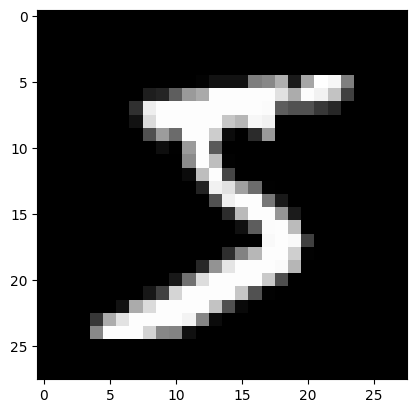

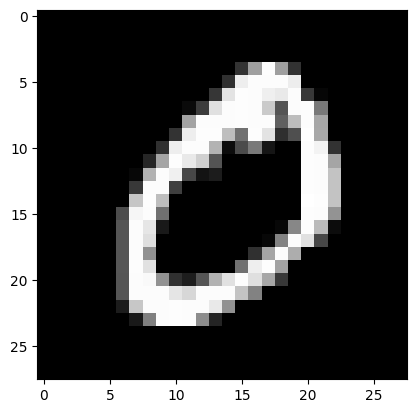

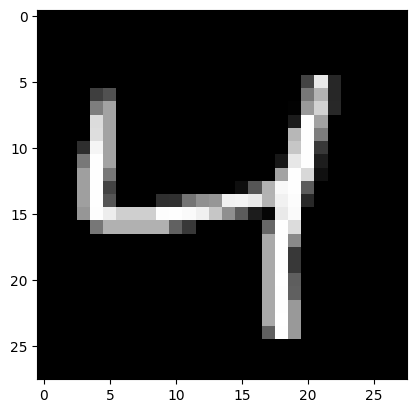

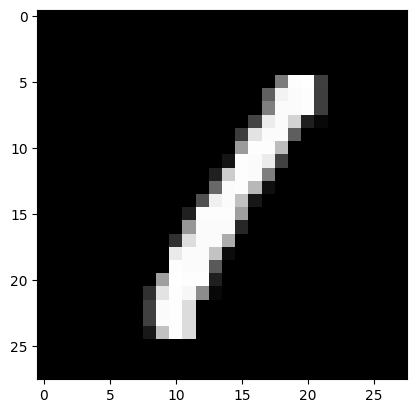

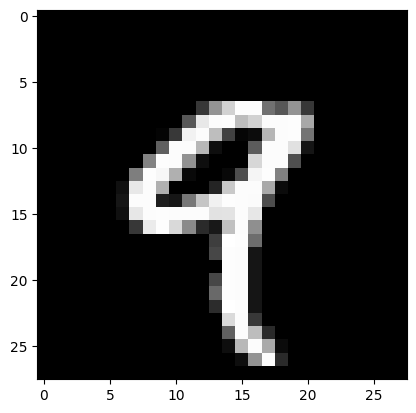

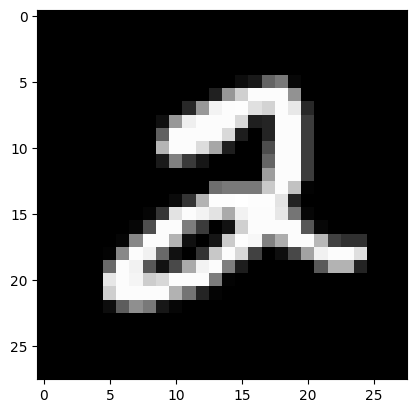

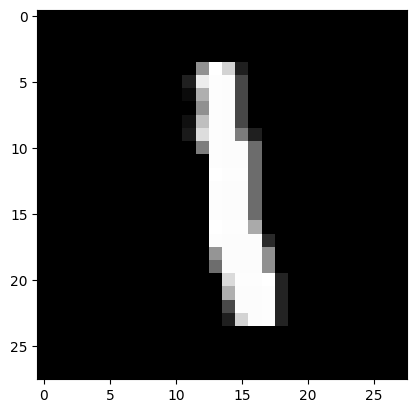

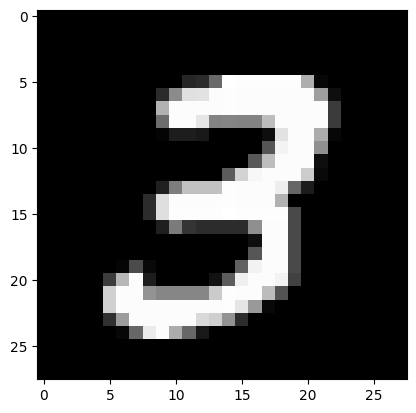

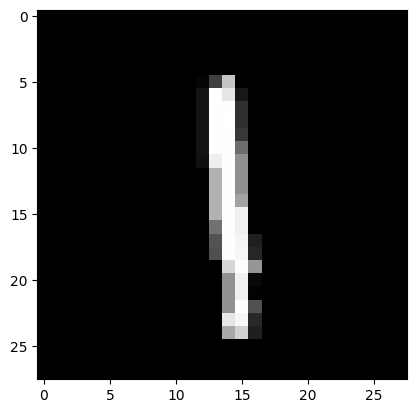

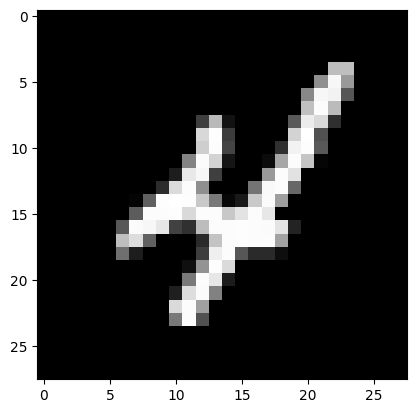

In [39]:
for i in range(10):
  plt.imshow(x_train[i], cmap = 'grey')
  plt.show()

In [40]:
# change to be categorical values for numbers 0-9
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [41]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
x_trainraveled.shape

(60000, 784)

In [42]:
mlp = keras.Sequential([                     # four layers of perceptrons
  layers.Dense(320, activation="sigmoid"),   # should be close to same as above size
  layers.Dense(32, activation="sigmoid"),
  layers.Dense(32, activation="sigmoid"),
  layers.Dense(10, activation="softmax")     # need 10 since with was 10 possible outputs
  ])

In [43]:
mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
history = mlp.fit(x_trainraveled, y_train,
                  batch_size=120,
                  epochs=10, # small for this because simple problem
                  validation_split=0.25, # internal train and test sets within
                  verbose = 1 )

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5076 - loss: 1.8092 - val_accuracy: 0.8953 - val_loss: 0.5902
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9069 - loss: 0.4841 - val_accuracy: 0.9289 - val_loss: 0.2901
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9362 - loss: 0.2604 - val_accuracy: 0.9466 - val_loss: 0.2041
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9532 - loss: 0.1836 - val_accuracy: 0.9553 - val_loss: 0.1658
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9663 - loss: 0.1343 - val_accuracy: 0.9603 - val_loss: 0.1443
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.1050 - val_accuracy: 0.9597 - val_loss: 0.1446
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9768 - loss: 0.0914 - val_accuracy: 0.9654 - val_loss: 0.1190
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9815 - loss: 0.0724 - val_accuracy: 0.

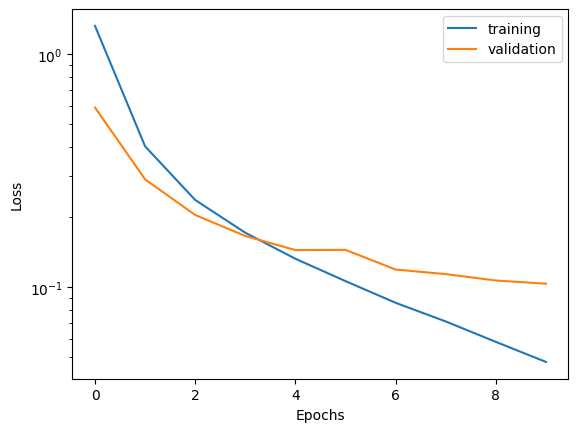

In [45]:
plt.plot(history.history["loss"], label = "training")
plt.plot(history.history["val_loss"], label = "validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale("log")
plt.show()

In [49]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9694 - loss: 0.1091


[0.0941811129450798, 0.9732999801635742]